# Cats and Dogs Prediction

Import libraries

In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [4]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [5]:
image_generator = ImageDataGenerator(rescale=1/255)

In [17]:
training_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="dataset/dogs_and_cats/train/",
                                                   target_size=(224, 224),
                                                   class_mode="categorical")

validation_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="dataset/dogs_and_cats/validation/",
                                                   target_size=(224, 224),
                                                   class_mode="categorical")

testing_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="dataset/dogs_and_cats/test/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   class_mode=None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


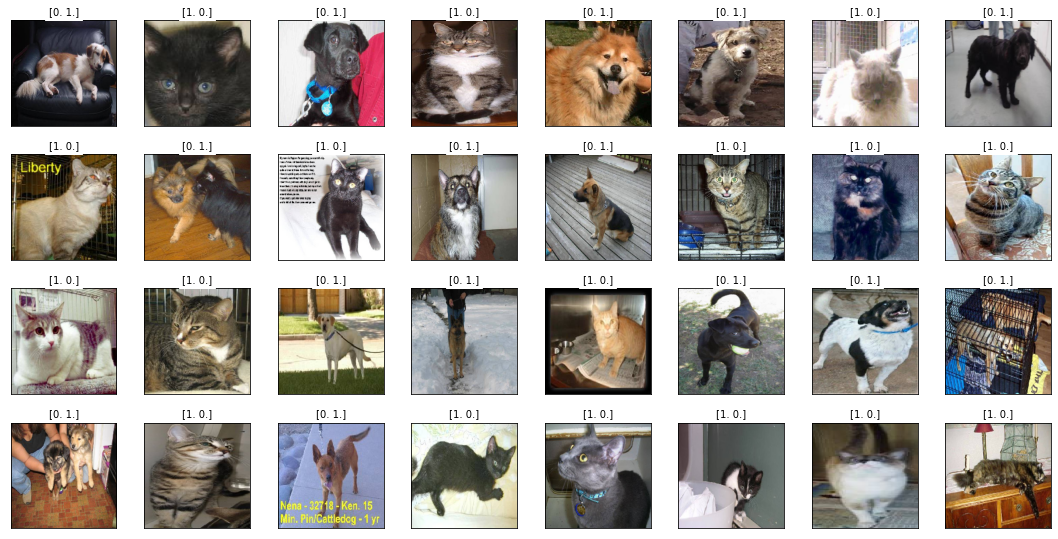

In [18]:
fig = plt.figure(figsize=(15, 15))

batch_1_img = training_set[0]
for i in range(32):
    digit = batch_1_img[0][i]
    label = batch_1_img[1][i]
    #digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit, cmap=plt.cm.binary)
    ax.set_title(str(label), backgroundcolor='white', fontsize=10)
plt.tight_layout()

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape = [224, 224, 3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation ='softmax')])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 flatten (Flatten)           (None, 93312)             0

In [21]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [22]:
history = model.fit(training_set, epochs=20, validation_data=validation_set)

Epoch 1/20
63/63 [==============================] - 19s 222ms/step - loss: 0.7367 - accuracy: 0.5385 - val_loss: 0.6862 - val_accuracy: 0.5840
Epoch 2/20
63/63 [==============================] - 6s 90ms/step - loss: 0.6662 - accuracy: 0.5960 - val_loss: 0.6948 - val_accuracy: 0.5380
Epoch 3/20
63/63 [==============================] - 6s 88ms/step - loss: 0.6159 - accuracy: 0.6800 - val_loss: 0.6411 - val_accuracy: 0.5970
Epoch 4/20
63/63 [==============================] - 6s 89ms/step - loss: 0.5127 - accuracy: 0.7485 - val_loss: 0.6020 - val_accuracy: 0.6710
Epoch 5/20
63/63 [==============================] - 6s 89ms/step - loss: 0.4005 - accuracy: 0.8295 - val_loss: 0.6440 - val_accuracy: 0.6750
Epoch 6/20
63/63 [==============================] - 6s 89ms/step - loss: 0.2951 - accuracy: 0.8745 - val_loss: 0.7405 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 6s 89ms/step - loss: 0.2035 - accuracy: 0.9225 - val_loss: 0.7567 - val_accuracy: 0.6880
Epoch 8/20


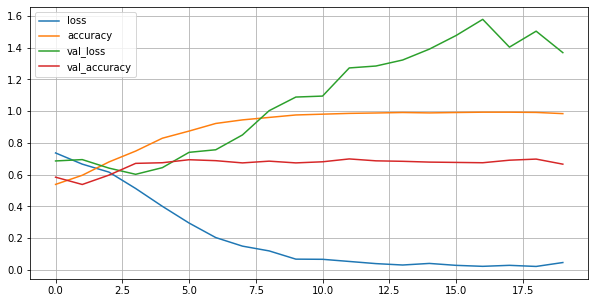

In [23]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.show()